# Concatenar y apendizar data sets

A veces tenemos datos que provienen de dos bases de datos distintas. En este ejemplo clásio, tenemos datos de vinos blanco y rojos. Se centra en componentes y valores numéricos del vino, no tanto del tipo.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [5]:
red_wine = pd.read_csv("../Datasets/winequality-red.csv", sep = ";") # aqui está separado por punto y coma
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
red_wine.columns.values # vemos los nombres de las columnas

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [8]:
red_wine.shape

(1599, 12)

In [9]:
white_wine = pd.read_csv("../Datasets/winequality-white.csv", sep = ";")
white_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
white_wine.columns.values
#no solo son las mismas, sino que tienen el mismo orden

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [11]:
white_wine.shape
# vemos que hay mas filas, pero el mismo numero de columnas

(4898, 12)

Estas son buenas circunstancias para juntar dos data sets horizontalmente. En python tenemos dos tipos de ejes:
* axis = 0 denota el eje horizontal
* axis = 1 denota el eje vertical



## método concat

* El método ``concat``concatena un **DataFrame** al final de otro.
* Los índices originales se quedan por default. El parámetro ``ignore_index``se puede poner True para generar un nuevo índice.
* El parámetro ``keys``crea un objeto **MultiIndex** utilizando las claves/etiquetas.
* Pandas puede concatener DataFrames a lo largo de filas o columnas.
* Pandas incluye todas las columnas que existen en un **DataFrame** determinado. Si no hay valores que concuerden, Pandas utilizará valores ``Nan``.
* El argumento ``axis``nos permite especificar si la concatenación se hace en filas o columnas.

In [12]:
#combinacion horizontal
wine_data = pd.concat([red_wine,white_wine], axis=0)
wine_data.shape
# vemos que ya tenemos todas las filas

(6497, 12)

In [15]:
#nos fijamos que la concatenacion sea correcta
wine_data.sample(n=10) # vemos que primero están los datos del vino tinto

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3836,8.0,0.270,0.33,1.2,0.050,41.0,103.0,0.99002,3.00,0.45,12.400000,6
174,7.5,0.270,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.200000,5
1300,9.0,0.245,0.38,5.9,0.045,52.0,159.0,0.99500,2.93,0.35,10.200000,6
2545,7.2,0.220,0.24,1.4,0.041,17.0,159.0,0.99196,3.25,0.53,11.200000,6
4353,7.4,0.160,0.30,1.4,0.064,34.0,166.0,0.99136,3.11,0.42,11.433333,6
631,10.4,0.280,0.54,2.7,0.105,5.0,19.0,0.99880,3.25,0.63,9.500000,5
4509,6.7,0.230,0.17,1.3,0.061,14.0,100.0,0.99250,3.07,0.55,9.500000,5
3788,6.6,0.270,0.52,8.1,0.044,53.0,202.0,0.99548,3.18,0.48,9.500000,5
3132,6.3,0.170,0.32,4.2,0.040,37.0,117.0,0.99182,3.24,0.43,11.300000,6
231,8.3,0.280,0.40,7.8,0.041,38.0,194.0,0.99760,3.34,0.51,9.600000,6


In [19]:
wine_data.loc[3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
#string1 = "Hello!!!???ß"
#string1.strip('?!ß')

In [20]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 917.9 KB


In [21]:
white_wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [22]:
wine_data.tail()
# vemos que los de abajo son los del vino blanco
# Esto se llama apilar los datos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [24]:
# tomemos dos pedazos
data1 = wine_data.head(10) # las primeras diez filas
data2 = wine_data[300:310] #algunas filas
data3 = wine_data.tail(10) # las ultimas diez filas

In [16]:
wine_scramble = pd.concat([data1,data2,data3])
wine_scramble

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [25]:
wine_scramble = pd.concat([data2,data1,data3])
wine_scramble
# y vemos el orden es diferente

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
300,7.5,0.530,0.06,2.60,0.086,20.0,44.0,0.99650,3.38,0.59,10.7,6
301,11.1,0.180,0.48,1.50,0.068,7.0,15.0,0.99730,3.22,0.64,10.1,6
302,8.3,0.705,0.12,2.60,0.092,12.0,28.0,0.99940,3.51,0.72,10.0,5
303,7.4,0.670,0.12,1.60,0.186,5.0,21.0,0.99600,3.39,0.54,9.5,5
304,8.4,0.650,0.60,2.10,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,5
305,10.3,0.530,0.48,2.50,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,6
306,7.6,0.620,0.32,2.20,0.082,7.0,54.0,0.99660,3.36,0.52,9.4,5
307,10.3,0.410,0.42,2.40,0.213,6.0,14.0,0.99940,3.19,0.62,9.5,6
308,10.3,0.430,0.44,2.40,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6
309,7.4,0.290,0.38,1.70,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,6


In [26]:
wine_scramble = pd.concat([data2,data1,data3], ignore_index=True)
wine_scramble

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.530,0.06,2.60,0.086,20.0,44.0,0.99650,3.38,0.59,10.7,6
1,11.1,0.180,0.48,1.50,0.068,7.0,15.0,0.99730,3.22,0.64,10.1,6
2,8.3,0.705,0.12,2.60,0.092,12.0,28.0,0.99940,3.51,0.72,10.0,5
3,7.4,0.670,0.12,1.60,0.186,5.0,21.0,0.99600,3.39,0.54,9.5,5
4,8.4,0.650,0.60,2.10,0.112,12.0,90.0,0.99730,3.20,0.52,9.2,5
5,10.3,0.530,0.48,2.50,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,6
6,7.6,0.620,0.32,2.20,0.082,7.0,54.0,0.99660,3.36,0.52,9.4,5
7,10.3,0.410,0.42,2.40,0.213,6.0,14.0,0.99940,3.19,0.62,9.5,6
8,10.3,0.430,0.44,2.40,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6
9,7.4,0.290,0.38,1.70,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,6


# Datos distribuidos
Ahora queremos unir varios data sets, como por ejemplo cuando cada dia se guardan distintos valores, cada dia se guarda una base de datos. Por ejemplo, datos de una estacion meteorologica en distintos puntos de la ciudad.

In [33]:
# primero importamos el primer fichero para corroborar la estructura

data = pd.read_csv("../Datasets/distributed-data/001.csv")

In [34]:
data.head()
# vemos que se ha cargado correctamente
# ID es el punto de acceso a los datos y muestran nivelses de sulfato y nitratos
# el datasets tiene suficiente filas que no son nans, aunque haya varios

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [31]:
data.shape
# 1461 filas y tenemos 300 archivose

(3652, 4)

In [32]:
# todos los data sets tienen las mismas filas y fueron tomados al mismo tiempo, creo

Procedimiento:
* Importar el primer fichero
* Hacemos un bucle para ir recorriendo todos y cada uno de los ficheros,  *Importantes tener una consistencia en el nombre de los ficheros.
* Cada uno de ellos debe apendizarse (añadirse alfinal) del primero
* Repetimos el bucle hasta que no queden ficheros

In [35]:
filepath = "../Datasets/distributed-data/"
# hacemos un atajo

data = pd.read_csv("../Datasets/distributed-data/001.csv")

final_length = len(data)

for i in range(2,333): # recordad que el ultimo no se toma en cuenta
    if i < 10:
        filename = "00" + str(i) # por cuestiones de formato tiene que ser asi
    elif 10 <= i < 100:
        filename = "0" + str(i)
    elif i >= 100:
        filename = str(i)
    # por eso hay que ser consistente con los nombres
    
    file = filepath + filename + ".csv"
    
    temp_data = pd.read_csv(file) # archivo variable
    
    final_length += len(temp_data)
    
    data = pd.concat([data,temp_data], axis = 0) # concatenacion horizontal
    
    

In [36]:
data.shape
# vemos que me ha hecho las cosas bien
# esto ya seria big data

(772087, 4)

In [37]:
data.tail(10)

,Date,sulfate,nitrate,ID
721,2004-12-22,NaN,NaN,332
722,2004-12-23,NaN,NaN,332
723,2004-12-24,NaN,NaN,332
724,2004-12-25,NaN,NaN,332
725,2004-12-26,NaN,NaN,332
726,2004-12-27,NaN,NaN,332
727,2004-12-28,NaN,NaN,332
728,2004-12-29,NaN,NaN,332
729,2004-12-30,NaN,NaN,332
730,2004-12-31,NaN,NaN,332


In [26]:
data.head(10)
# bien, empezamos con el 1 y terminamos con el 332

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1
5,2003-01-06,NaN,NaN,1
6,2003-01-07,NaN,NaN,1
7,2003-01-08,NaN,NaN,1
8,2003-01-09,NaN,NaN,1
9,2003-01-10,NaN,NaN,1


In [38]:
# otra forma de checar, con el final length
final_length == data.shape[0]
# vemos que coincide, tiene que ser true

True

# Joins de datasets
Cruzar datos que proceden de diferentes fuentes, tienes que estar familiarizado con las bases de datos, sobre todo en alguna columna que sirva como union o algo. Podriamos tener la tabla con datos de de contacto y otra tabla con informacion de compras. El usuario 1 ha comprado una tele, se ha registrado y no ha comprado nada. Left y right join

In [39]:
datapath = "/Users/vanotole/Documents/Doctorado/PythonPandas/PythonPandas2024B/Datasets/"

In [40]:
data_main = pd.read_csv(datapath + "Medals.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf8 in position 679: invalid start byte

In [42]:
data_main = pd.read_csv(datapath + "Medals.csv", encoding = "ISO-8859-1")
# hubo problemas con la codificacion UTF 8, utilizan otra
# debe haber atletas extranjeros cuyos caracteres se usen en otra codificacion
data_main.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [44]:
data_filtered = data_main[675:685]
data_filtered

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
675,Hermann Maier,33.0,2006,02/26/2006,0,1,1,2
676,Benjamin Raich,27.0,2006,02/26/2006,2,0,0,2
677,Marlies Schild,24.0,2006,02/26/2006,0,1,1,2
678,Rainer Schönfelder,28.0,2006,02/26/2006,0,0,2,2
679,Kjetil André Aamodt,30.0,2002,02/24/2002,2,0,0,2
680,Renate Götschl,26.0,2002,02/24/2002,0,1,1,2
681,Lasse Kjus,31.0,2002,02/24/2002,0,1,1,2
682,Bode Miller,24.0,2002,02/24/2002,0,2,0,2
683,Anja Pärson,20.0,2002,02/24/2002,0,1,1,2
684,Benjamin Raich,23.0,2002,02/24/2002,0,0,2,2


In [45]:
data_main.shape

(8618, 8)

In [47]:
# vemos que los atletas no aparecen una sola vez, pues puede participar varios años
# checamos esto con
a = data_main["Athlete"].unique().tolist() # para que solo vea los unicos
len(a)

6956

In [48]:
#tenemos otro data set para ver de que pais son los atletas
data_country = pd.read_csv(datapath + "Athelete_Country_Map.csv", encoding = "ISO-8859-1")

In [49]:
data_country.head()
#vemos de entrada que no son las mismas filas

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [66]:
data_country[data_country['Country']=='Japan']

,Athlete,Country
34,Ryosuke Irie,Japan
41,Satomi Suzuki,Japan
48,Kosuke Kitajima,Japan
91,Kohei Uchimura,Japan
164,Miya Tachibana,Japan
...,...,...
6918,Takaharu Furukawa,Japan
6920,Ren Hayakawa,Japan
6923,Miki Kanie,Japan
6924,Kaori Kawanaka,Japan


In [50]:
len(data_country)
# no coinciden, hay 14 filas extras
# lo mas logico es pensar es que un atleta haya jugado por mas de un pais en dif años
# cuando un pais cambia de nombre por ejemplo

6970

In [51]:
# vamos a ver
# que hacemos con este tipo de usuarios
# tenemos que localizarlo
data_country[data_country["Athlete"] == "Aleksandar Ciric"]
# serbia y montenegro

,Athlete,Country
1029,Aleksandar Ciric,Serbia
1086,Aleksandar Ciric,Serbia and Montenegro


In [53]:
# cuando pasa esto lo mas normal es borrar el duplicado
# El problema son las medallas, para que pais van

#Falta un fichero, el del atleta con el deporte, 
# un atleta puede estar en mas de un deporte

data_sports = pd.read_csv(datapath + "Athelete_Sports_Map.csv", encoding = "ISO-8859-1")
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [54]:
data_sports.shape
#vemos que son menos que las medallas originales asi que si

(6975, 2)

In [55]:
# pero cual jugador jugó varios deportes
data_sports[(data_sports["Athlete"] == "Chen Jing") | 
            (data_sports["Athlete"] == "Richard Thompson") |
            (data_sports["Athlete"] == "Matt Ryan")
           ]

,Athlete,Sport
528,Richard Thompson,Athletics
1308,Chen Jing,Volleyball
1419,Chen Jing,Table Tennis
2727,Matt Ryan,Rowing
5003,Matt Ryan,Equestrian
5691,Richard Thompson,Baseball


Tenemos tres datas set, de medallas, pais y deporte, pero ahora cómo los unimos. Lo que tenemos en comun es el nombre del atleta. Hacemos uso de la funcion merge

## Método ``merge``

* El método ``merge``realiza un join a dos DataFrame basado en valores comunnes en una columna o un índice.

In [56]:
data_main_country = pd.merge(left = data_main, right = data_country,
                            left_on = "Athlete", right_on = "Athlete")
# juntar el archivo main con el pais y el nombre de la columna que se va a usar
# para hacer el matching


In [57]:
data_main_country.head()
# vemos que si tenemos el pais al final

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia


In [58]:
# pero aun asi tenemos que ver las filas
data_main_country.shape
# vemos que salen mas que el original, pues existen diversos atletas que jugaron por dos paises
# por lo tanto algunos tendran medallas duplicadas

(8657, 9)

In [59]:
data_main_country[data_main_country["Athlete"] == "Aleksandar Ciric"]
# vemos que este señor tiene sus medallas duplicadas para los años de  2000-2008

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1215,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1216,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia and Montenegro
1297,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1298,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia and Montenegro
1379,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia
1380,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia and Montenegro


In [60]:
# Este no es un caso de uno a uno, es de uno a muchos
# por eso tenemos un exceso de casos, esto dberia decir a partir de que año se camba de pais
# y utilizar los años para unir los datos

# para eliminar duplicados tenemos que aplicar algo antes del merge que hicimos

data_country_dp = data_country.drop_duplicates(subset = "Athlete") # aqui solo dejará un pais


In [62]:
len(data_country_dp) == len(a) # igual a los unicos del main
# esto es para comprobar que tiens toda la informacion bien


True

In [63]:
# Volvemos a hacer el merge
data_main_country = pd.merge(left = data_main, right = data_country_dp,
                            left_on = "Athlete", right_on = "Athlete")

In [64]:
data_main_country.shape
# vemos que hay menos fila que antes, y las mismas que teniamos en el main

(8618, 9)

In [65]:
data_main_country[data_main_country["Athlete"] == "Aleksandar Ciric"]
# Vemos que ahora tenemos puro serbia, como queriamos-



,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1208,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1284,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1359,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia


In [67]:
# El siguiente paso es juntarle la informacion adicional del deporte
# tendremos problemas similares

data_sports_dp = data_sports.drop_duplicates(subset = "Athlete") # me quito duplicados basandome en atleta


In [68]:
len(data_sports_dp) == len(a)
# veo que si conincide con el unique main

True

In [69]:
data_final = pd.merge(left = data_main_country, right = data_sports_dp,
                      left_on = "Athlete", right_on = "Athlete"
)

In [71]:
data_final.head(20)
# ya tenemos que tenemos la informacion de pais y deporte sin repetir

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia,Gymnastics
5,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia,Swimming
6,Missy Franklin,17.0,2012,08/12/2012,4,0,1,5,United States,Swimming
7,Ryan Lochte,27.0,2012,08/12/2012,2,2,1,5,United States,Swimming
8,Allison Schmitt,22.0,2012,08/12/2012,3,1,1,5,United States,Swimming
9,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


In [72]:
data_final.shape

(8618, 10)

# Tipos de joins

In [73]:
from IPython.display import Image # para incluir imagenes en el notebook
import numpy as np

In [79]:
# usamos los datos de los atletas y medallas
out_athletes = np.random.choice(data_main["Athlete"],6, replace = False) # seleccionar 6 atletas al azar
# se va a usar esta info para borrar info de su nacion y deporte

In [80]:
out_athletes

array(['Ricky Berens', 'Carolin Leonhardt', 'Mariya Savinova',
       'Ryo Tateishi', 'Samuele Papi', 'Giacomo Pastorino'], dtype=object)

In [81]:
# incluimos Michael Phelps para utilizar a alguien grueso
data_country_dlt = data_country_dp[(~data_country_dp["Athlete"].isin(out_athletes))
                                  & (data_country_dp["Athlete"] != "Michael Phelps")
                                  ]

In [82]:
data_country_dlt.head()

,Athlete,Country
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
5,Ryan Lochte,United States


In [83]:
print(len(data_country_dlt))
print(len(data_country_dp))
# unos pocos menos de los que habia en dp
# hemos eliminado 7 cosas

6949
6956


In [84]:
# Hacemos otros sets sin estos individuos en main y country
data_sports_dlt = data_sports_dp[(~data_sports_dp["Athlete"].isin(out_athletes))
                                  & (data_sports_dp["Athlete"] != "Michael Phelps")
                                  ]
data_main_dlt = data_main[(~data_main["Athlete"].isin(out_athletes))
                                  & (data_main["Athlete"] != "Michael Phelps")
                                  ]

In [85]:
len(data_country_dlt)

6949

In [86]:
len(data_main_dlt)
# los archivos dp son los que no tienen repeticion asi que tienen que coincidir
# hemos eliminado a mas de siete porque michael phelps ha participado en varios años


8605

## Inner Join
* Devuelve un data grame con las filas que tienen valor tanto en el primer como en el segundo data frame que estamos uniendo.
* El número de filas será igual al número de filas comunes que tengan ambos data sets
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces el inner join de A y B tendrá 30 filas
* En términos de teoría de conjuntos, se trata de la intersección de los dos conjuntos.

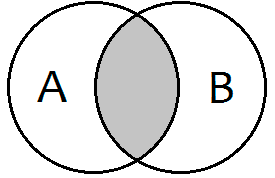

In [87]:
Image(filename = "Imagenes/inner-join.png")

In [88]:
#data_main contiene toda la info
#data_country_dlt le falta info de 7 atletas
#vamos a ver el resultado de hacer el join
merged_inner = pd.merge(left = data_main, right = data_country_dlt,
                       how = "inner", left_on = "Athlete", right_on = "Athlete"
                       )

In [89]:
len(merged_inner)
# vemos que si respeta, nos da info de los atletas que estan en ambos data sets


8605

In [90]:
merged_inner.head(10)
# vemos que efectivamente no aparece Michael Phelps, pues no aparece en los dos sets

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
2,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia
3,Missy Franklin,17.0,2012,08/12/2012,4,0,1,5,United States
4,Ryan Lochte,27.0,2012,08/12/2012,2,2,1,5,United States
5,Allison Schmitt,22.0,2012,08/12/2012,3,1,1,5,United States
6,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
7,Ian Thorpe,17.0,2000,10/01/2000,3,2,0,5,Australia
8,Dara Torres,33.0,2000,10/01/2000,2,0,3,5,United States
9,Cindy Klassen,26.0,2006,02/26/2006,1,2,2,5,Canada


## Left Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, sin importar si tienen correspondencia en el de la derecha o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho, tendrán NaS en las columnas del data frame derecho.
* El número de filas sera igual al número de filas del data frame izquierdo
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A left join B tendrá 60 filas 
    
En este caso las cosas que solo estén en A, tendrán valores NA en los valores correspondientes a B. Lo que cae en la intersección tiene información adicional.

Ejemplo, tenemos la base de datos de facebook y google. Google tiene info de a que estoy suscrito



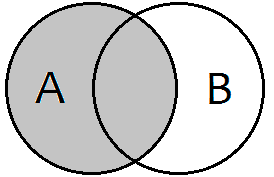

In [91]:
Image(filename = "Imagenes/left-join.png")

In [92]:
merged_left = pd.merge(left = data_main, right = data_country_dlt,
                       how = "left", left_on = "Athlete", right_on = "Athlete"
                       )

In [93]:
len(merged_left)
# vemos que tenemos todas las filas del set de la izquierda main, incluido Phelps

8618

In [94]:
merged_left.head()
# vemos que phelps no tiene los datos de country

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia


## Right Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la derecha, sin importar si tienen correspondencia en el de la izquierda o no.
* Las filas del data frame final que no correspondan a nunguna fila del data grame izquierdo, tendrán Nas en las columnas del data frame izquierdo.
* El número de filas será igual al número de filas del data frame derecho.
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces a right join B tendrá 50 filas
* En términos de teoría de conjuntos, se trata del propio data set de la derecha quien, además tiene la intersección en su interior.

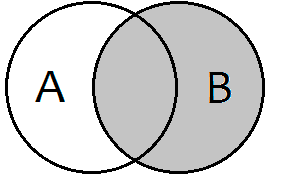

In [95]:
Image(filename = "Imagenes/right-join.png")

In [96]:
# para ejemplificar usamos el data main deleted que le faltan y el country completo que si tiene toda la info

merged_right = pd.merge(left = data_main_dlt, right = data_country_dp,
                       how = "right", left_on = "Athlete", right_on = "Athlete"
                       )

In [97]:
len(merged_right)
# el que tiene prioridad es el data set del pais

8612

In [98]:
merged_right.head(10)
# se colocan hasta el final los que estan deleted
# como no hay valores de ellos en el main dl y solo tenemos info del country completo

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
1,Natalie Coughlin,25.0,2008.0,08/24/2008,1.0,2.0,3.0,6.0,United States
2,Natalie Coughlin,21.0,2004.0,08/29/2004,2.0,2.0,1.0,5.0,United States
3,Natalie Coughlin,29.0,2012.0,08/12/2012,0.0,0.0,1.0,1.0,United States
4,Aleksey Nemov,24.0,2000.0,10/01/2000,2.0,1.0,3.0,6.0,Russia
5,Alicia Coutts,24.0,2012.0,08/12/2012,1.0,3.0,1.0,5.0,Australia
6,Missy Franklin,17.0,2012.0,08/12/2012,4.0,0.0,1.0,5.0,United States
7,Ryan Lochte,27.0,2012.0,08/12/2012,2.0,2.0,1.0,5.0,United States
8,Ryan Lochte,24.0,2008.0,08/24/2008,2.0,0.0,2.0,4.0,United States
9,Ryan Lochte,20.0,2004.0,08/29/2004,1.0,1.0,0.0,2.0,United States


## Outer (o full) Join
* Devuelve un data frame con todas las filas de ambos, reemplazando las ausencias de uno o de otro con NAs en la región específica.
* Las filas del data frame final que no correspondan a nunguna fila del data frame derecho (o izquierdo), tendrán NAs en las columnas del data frame derecho (o izquirdo).
*El número de filas será igual al máximo número de filas de ambos data frames.
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A outer join B tendrá 60 + 50 - 30 = 80
* En términos de teoría de conjuntos, se trata de la unión de conjuntos.
 

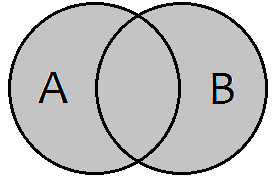

In [99]:
Image(filename = "Imagenes/outer-join.png")

In [100]:
# con lo que tengo no me sirve pues son los mismos que eleminé

#añadimos para el ejemplo a alguien, en forma de diccionario
data_country_it = data_country_dlt._append(
    {
        "Athlete": "Juan Perez",
        "Country": "Mexico"
    }, ignore_index = True
)

In [101]:
data_country_it

,Athlete,Country
0,Natalie Coughlin,United States
1,Aleksey Nemov,Russia
2,Alicia Coutts,Australia
3,Missy Franklin,United States
4,Ryan Lochte,United States
...,...,...
6945,Kateryna Serdiuk,Ukraine
6946,Wietse van Alten,Netherlands
6947,Sandra Wagner-Sachse,Germany
6948,Rod White,United States


In [102]:
# ya no se tiene append en las nuevas versiones de Pandas, entonces usamos concat
data_country_it = pd.DataFrame(
    {
    "Athlete": "Juan Perez",
    "Country": "Mexico"
    }, index=([0])
)

data_country_it = pd.concat([data_country_dlt,data_country_it], axis=0, ignore_index=True)
data_country_it.tail()

,Athlete,Country
6945,Kateryna Serdiuk,Ukraine
6946,Wietse van Alten,Netherlands
6947,Sandra Wagner-Sachse,Germany
6948,Rod White,United States
6949,Juan Perez,Mexico


In [103]:
merged_outer = pd.merge(left = data_main, right = data_country_it,
                       how = "outer", left_on = "Athlete", right_on = "Athlete"
                       )
# aqui lo que añadirian seria a mi mismo en la lista country it

In [104]:
len(merged_outer)
# vemos que hay una fila mas de informacion

8619

In [105]:
merged_outer.head()
# por un lado tengo atletas de los cuales no conozco su pais parte del country dlt

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,A. J. Mleczko,26.0,2002.0,02/24/2002,0.0,1.0,0.0,1.0,United States
1,Aaron Armstrong,30.0,2008.0,08/24/2008,0.0,1.0,0.0,1.0,Trinidad and Tobago
2,Aaron Egbele,25.0,2004.0,08/29/2004,0.0,0.0,1.0,1.0,Nigeria
3,Aaron Gate,21.0,2012.0,08/12/2012,0.0,0.0,1.0,1.0,New Zealand
4,Aaron McIntosh,28.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,New Zealand


In [106]:
merged_outer.tail(30)
# y que ademas tenemos uno mas

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8589,Ángel Di María,20.0,2008.0,08/24/2008,1.0,0.0,0.0,1.0,Argentina
8590,Ángel Matos,23.0,2000.0,10/01/2000,1.0,0.0,0.0,1.0,Cuba
8591,Áron Szilágyi,22.0,2012.0,08/12/2012,1.0,0.0,0.0,1.0,Hungary
8592,Ásgeir Örn Hallgrímsson,24.0,2008.0,08/24/2008,0.0,1.0,0.0,1.0,Iceland
8593,Ânderson,20.0,2008.0,08/24/2008,0.0,0.0,1.0,1.0,Brazil
8594,Ådne Søndrål,30.0,2002.0,02/24/2002,0.0,0.0,1.0,1.0,Norway
8595,Édgar Barreto,20.0,2004.0,08/29/2004,0.0,1.0,0.0,1.0,Paraguay
8596,Élodie Ouédraogo,27.0,2008.0,08/24/2008,0.0,1.0,0.0,1.0,Belgium
8597,Émilie Gomis,28.0,2012.0,08/12/2012,0.0,1.0,0.0,1.0,France
8598,Émilie Le Pennec,16.0,2004.0,08/29/2004,1.0,0.0,0.0,1.0,France


In [107]:
merged_outer[merged_outer["Athlete"] == 'Juan Perez']

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
3699,Juan Perez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mexico


In [108]:
# vemos de donde hemos partido
# resumen
len(data_main)
# el arvhivo original de los atletas y sus medallas por año

8618

In [109]:
len(data_main_dlt) # hemos eliminado unos pocos 

8605

In [110]:
# ylos del pais (sin duplicado)
len(data_country_dp)

6956

In [111]:
#le desaparecemos los individuos
len(data_country_dlt)

6949

In [112]:
# vemos que el mas pequeño es el inner
len(merged_inner) # solo se queda con la interseccion

8605

In [107]:
len(merged_left) # coincide con el data main

8618

In [108]:
len(merged_right) # coincide con el rellenado de NAN

8616

In [109]:
len(merged_outer) # es el mayor de todos pues hay un dato más 

8619